# DOG_CAT CLASSIFICATION

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import re
from os import listdir
from tensorflow.keras.preprocessing.image import ImageDataGenerator,smart_resize
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf

In [ ]:
from os import listdir
path = '/content/drive/MyDrive/DOGCAT/images'

In [ ]:
from os import mkdir
mkdir('/content/drive/MyDrive/DOGCAT/images/cats')
mkdir('/content/drive/MyDrive/DOGCAT/images/dogs')

In [ ]:
X,Y={},[]
cnt = 0
for name in listdir(path):
    if(re.search('.jpg',name)):
        if(name[0].isupper()):
            plt.imsave(arr=plt.imread(path+name),fname = path+'cats/'+name)
        else:
            plt.imsave(arr=plt.imread(path+name),fname = path+'dogs/'+name)

In [ ]:
i_g = ImageDataGenerator()

In [ ]:
i_g.flow_from_directory('/content/drive/MyDrive/catdog')

Found 7395 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential()
model.add(Conv2D(input_shape = (200,200,3),filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(4,4)))
model.add(Conv2D(input_shape = (200,200,3),filters=64,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(4,4)))
model.add(Conv2D(input_shape = (100,100,3),filters=128,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'adam' , loss= tf.keras.losses.binary_crossentropy,metrics = ['accuracy'])

In [ ]:
train = i_g.flow_from_directory('/content/drive/MyDrive/catdog', target_size = (200,200),color_mode='rgb',batch_size = 16, class_mode='binary')

Found 7395 images belonging to 2 classes.


In [ ]:
train.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
model.fit_generator(train,epochs = 25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/25
463/463 [==============================] - 4552s 10s/step - loss: 0.7204 - accuracy: 0.6937
Epoch 2/25
463/463 [==============================] - 275s 594ms/step - loss: 0.5144 - accuracy: 0.7446
Epoch 3/25
463/463 [==============================] - 275s 594ms/step - loss: 0.4484 - accuracy: 0.7830
Epoch 4/25
463/463 [==============================] - 273s 589ms/step - loss: 0.4200 - accuracy: 0.8061
Epoch 5/25
463/463 [==============================] - 273s 589ms/step - loss: 0.3684 - accuracy: 0.8407
Epoch 6/25
463/463 [==============================] - 280s 605ms/step - loss: 0.3108 - accuracy: 0.8617
Epoch 7/25
463/463 [==============================] - 275s 595ms/step - loss: 0.2654 - accuracy: 0.8874
Epoch 8/25
463/463 [==============================] - 275s 594ms/step - loss: 0.2227 - accuracy: 0.9066
Epoch 9/25
463/463 [==============================] - 281s 605ms/step - loss: 0.1935 - accuracy: 0.9227
Epoch 10/25
463/463 [==============================] - 275s 594ms

In [ ]:
%matplotlib inline

In [ ]:
def predict_cat_dog(image_path,model):
    img = plt.imread(image_path)
    a = smart_resize(img,size=(200,200),interpolation = 'nearest')
    plt.imshow(a)
    a = a.reshape(1,200,200,3)
    if(np.round(model.predict(a))):
        return 'DOG'
    else:
        return 'CAT'

CAT


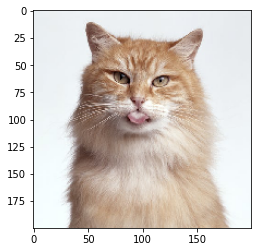

In [ ]:
print(predict_cat_dog('/content/drive/MyDrive/cat.jpg',model))

DOG


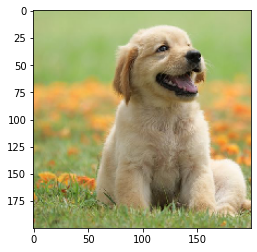

In [ ]:
print(predict_cat_dog('/content/drive/MyDrive/dog.jpg',model))

In [ ]:
model.save('/content/drive/MyDrive/cat_dog_classifier.h5')